### Wczytanie i eksploracja danych


In [ ]:
# Pobierz zbiór Auto MPG

import seaborn as sns
import pandas as pd

autompg_original = sns.load_dataset('mpg')

autompg = autompg_original.copy()

autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
# Sprawdź podstawowe statystyki danych

autompg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
autompg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
# Zidentyfikuj brakujące wartości

autompg.isnull().sum()


,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [ ]:
autompg = autompg.dropna()
autompg.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [ ]:
# Korelacja wyłącznie dla zmiennych numerycznych

autompg.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


### Wstępne przetwarzanie danych

In [ ]:
# Kodowanie za pomocą One-Hot Encoding

from sklearn.preprocessing import OneHotEncoder

autompg = pd.get_dummies(autompg, columns=['origin'], prefix = 'origin', dtype=int,drop_first=True)
autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,0,1


In [ ]:
# Standaryzacja danych numerycznych

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
autompg[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_japan', 'origin_usa', 'mpg']] = scaler.fit_transform(autompg[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_japan', 'origin_usa', 'mpg']])
autompg.head()
autompg = autompg.drop(columns=['name']) #wyrzucenie kolumny name ponieważ nie jest użyteczna do predykcji
autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.50239,0.774597
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.50239,0.774597
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.50239,0.774597
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.50239,0.774597
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.50239,0.774597


In [ ]:
autompg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,1.450087e-16,-1.087565e-16,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16,-1.160070e-15,1.812609e-17,4.531523e-17
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.853218e+00,-1.451004e+00,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00,-1.625315e+00,-5.023905e-01,-1.290994e+00
25%,-8.269250e-01,-8.640136e-01,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01,-8.098841e-01,-5.023905e-01,-1.290994e+00
50%,-8.927701e-02,-8.640136e-01,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02,5.547151e-03,-5.023905e-01,7.745967e-01
75%,7.125143e-01,1.483947e+00,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01,8.209784e-01,-5.023905e-01,7.745967e-01
max,2.970359e+00,1.483947e+00,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00,1.636410e+00,1.990484e+00,7.745967e-01


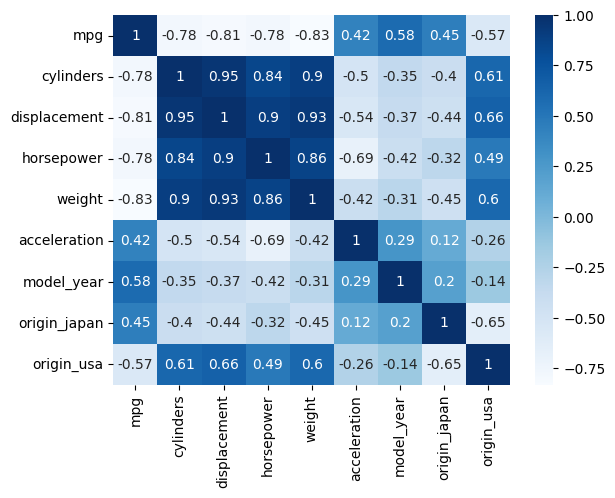

In [ ]:
# Sprawdź korelacje między zmiennymi i wybierz istotne cechy

autompgheat = sns.heatmap(autompg.corr(), annot=True, cmap='Blues')
autompgheat.figure.savefig('autompgheat.png')

Na pierwszy rzut oka najistotniejsze cechy to: cylinders, displacement, horespower oraz weight, natomiast są one też najsilniej skorelowane między sobą. Wybranie kilku takich cech może negatywnie wpłynąć na model. Najlepszą strategią byłoby wybranie jednej cechy, która jest najsilniej skorelowana z mpg spośród wyżej wymienionych oraz cech które mają wysoką korelacje z mpg, ale nie między sobą.


### Wybór cech i budowa modelu


In [ ]:
X = autompg[['acceleration', 'displacement', 'model_year', 'origin_japan']]
y = autompg['mpg']

In [ ]:
# Podział danych na zbiór treningowy i testowy

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=327)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
# Ocena modelu
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.27247448396551965
R-squared: 0.7012683161023969



R^2 wynosi około 0.70, co mówi nam, że model wyjaśnia około 70% zmienności w danych. To raczej dość satysfakcjonujący wynik. Błąd średniokwadratowy wynosi około 0.27. Oznacza to, że na ogół przewidywania modelu są w przybliżeniu bliskie rzeczywistym wartościom, ale nie idealne.

### Rozszerzenie analizy - porównanie różnych modeli regresji

In [ ]:
X1 = autompg.drop(columns="mpg")
y1 = autompg["mpg"]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42, test_size=0.2)

In [ ]:
model = LinearRegression()
model.fit(X1_train, y1_train)


LinearRegression()

In [ ]:
# Ocena modelu

y1_pred = model.predict(X1_test)
mse1 = mean_squared_error(y1_test, y1_pred)
r21 = r2_score(y1_test, y1_pred)

print(f"Mean Squared Error: {mse1}")
print(f"R-squared: {r21}")

Mean Squared Error: 0.17448652387109748
R-squared: 0.7922774714022579


R^2 wynosi około 0.79, co mówi nam, że model wyjaśnia około 79% zmienności w danych. Zwiększenie wyniku nie jest niczym dziwnym, ponieważ zwiększyliśmy liczbę zmiennych objaśniających. Błąd średniokwadratowy wynosi około 0.17. Oznacza to, że model poprawił się w stosunku do naszego poprzedniego.

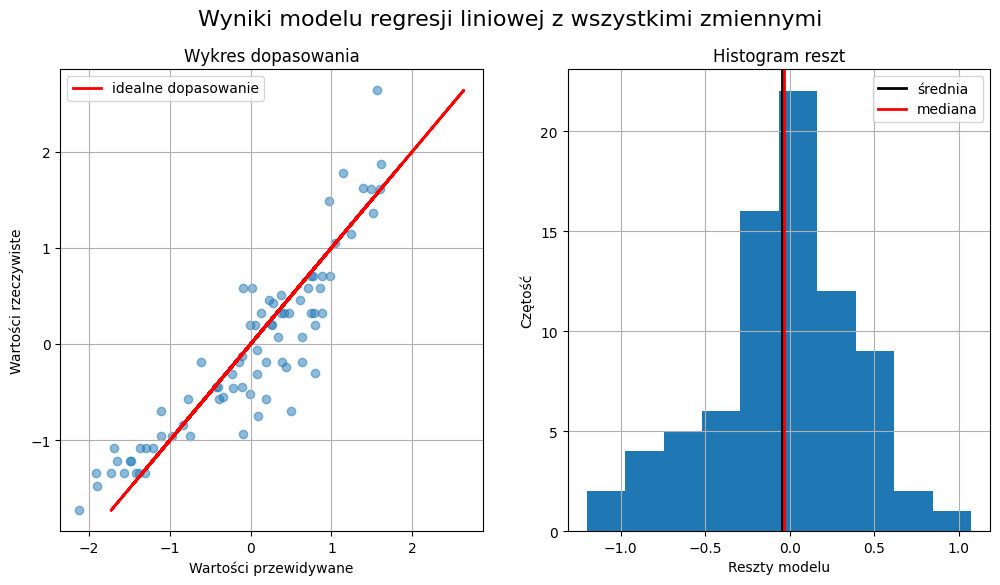

In [ ]:
# wizualizacja wyników i sprawdzenie założeń
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Wyniki modelu regresji liniowej z wszystkimi zmiennymi", fontsize=16)

# wykres dopasowania
axes[0].scatter(y1_pred, y1_test, alpha=0.5)
axes[0].plot(y1_test, y1_test, color="red", linewidth=2, label="idealne dopasowanie")
axes[0].set_title("Wykres dopasowania")
axes[0].set_xlabel("Wartości przewidywane")
axes[0].set_ylabel("Wartości rzeczywiste")
axes[0].legend()
axes[0].grid(True)

# histogram reszt
residuals_1 = y1_test - y1_pred
axes[1].hist(residuals_1, bins=10)
axes[1].axvline(residuals_1.mean(), color="black", linewidth=2, label="średnia")
axes[1].axvline(residuals_1.median(), color="red", linewidth=2, label="mediana")
axes[1].set_title("Histogram reszt")
axes[1].set_xlabel("Reszty modelu")
axes[1].set_ylabel("Czętość")
axes[1].legend()
axes[1].grid(True)

plt.show()

#### Wnioski
Na wykresie dopasowania możemy zauważyć, że punkty są rozrzucone dość blisko linii regresji co wskazuje na dobre dopasowanie. Jeżeli chodzi o histogram reszt, to widać lekką asymetrię, co może wskazywać na delikatne przeuczenie modelu bądź wpływ nieistotnych zmiennych.


#### Model Lasso

In [ ]:
# Model regresji Lasso

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.2)
model_lasso = lasso_reg.fit(X1_train, y1_train)
print(f"Beta_0: {model_lasso.intercept_}")
print(f"Liczba zmiennych: {model_lasso.n_features_in_}")
print(f"Zmienne modelu: {model_lasso.feature_names_in_}")

Beta_0: 0.012970679680398311
Liczba zmiennych: 8
Zmienne modelu: ['cylinders' 'displacement' 'horsepower' 'weight' 'acceleration'
 'model_year' 'origin_japan' 'origin_usa']


In [ ]:
# Istotne zmienne po modelowaniu

import numpy as np
idx = np.argwhere(model_lasso.coef_ != 0)
print(model_lasso.feature_names_in_[idx])

[['displacement']
 ['horsepower']
 ['weight']
 ['model_year']
 ['origin_usa']]


In [ ]:
# Ocena modelu

y1_pred_lasso = model_lasso.predict(X1_test)
mse_lasso = mean_squared_error(y_true=y1_test, y_pred=y1_pred_lasso)
r2_lasso = r2_score(y_true=y1_test, y_pred=y1_pred_lasso)
mae_lasso = mean_absolute_error(y_true=y1_test, y_pred=y1_pred_lasso)
print(f"MSE: {mse_lasso}")
print(f"R^2: {r2_lasso}")
print(f"MAE: {mae_lasso}")

MSE: 0.18476413802799113
R^2: 0.7800421883943904
MAE: 0.3082580080014419


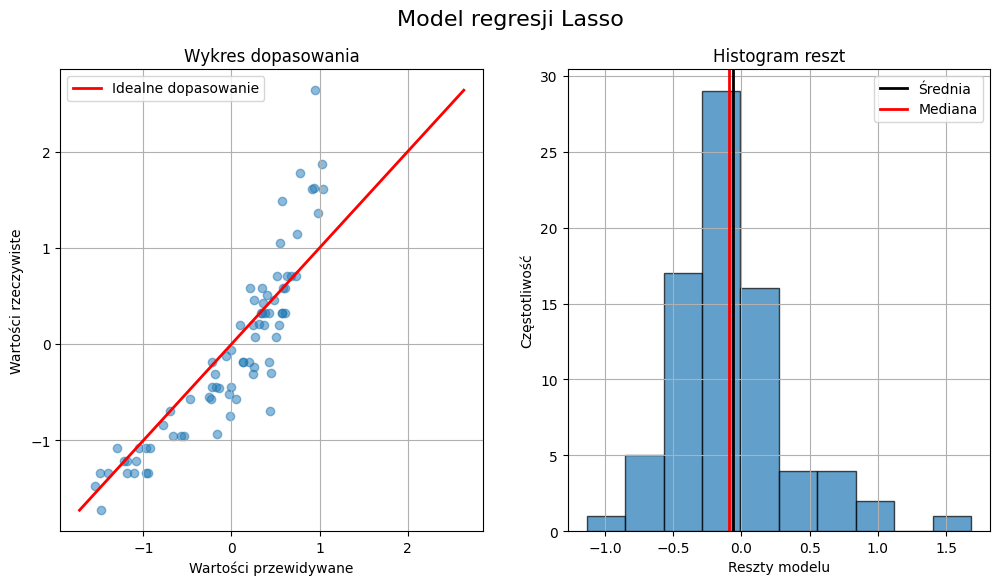

In [ ]:
import matplotlib.pyplot as plt

# Predykcje modelu Lasso
y1_pred_lasso = model_lasso.predict(X1_test)

# Tworzenie wykresu
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Model regresji Lasso", fontsize=16)

# Wykres dopasowania
axes[0].scatter(y1_pred_lasso, y1_test, alpha=0.5)
axes[0].plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], color="red", linewidth=2, label="Idealne dopasowanie")
axes[0].set_title("Wykres dopasowania")
axes[0].set_xlabel("Wartości przewidywane")
axes[0].set_ylabel("Wartości rzeczywiste")
axes[0].legend()
axes[0].grid(True)

# Histogram reszt
residuals_lasso = y1_test - y1_pred_lasso
axes[1].hist(residuals_lasso, bins=10, edgecolor="black", alpha=0.7)
axes[1].axvline(residuals_lasso.mean(), color="black", linewidth=2, label="Średnia")
axes[1].axvline(residuals_lasso.median(), color="red", linewidth=2, label="Mediana")
axes[1].set_title("Histogram reszt")
axes[1].set_xlabel("Reszty modelu")
axes[1].set_ylabel("Częstotliwość")
axes[1].legend()
axes[1].grid(True)

plt.show()


### Wnioski
Wykres dopasowania w tym przypadku również wygląda całkiem nieźle, chociaż widać, że wartości są bardziej rozproszone w pionie. Jeżeli chodzi o histogram, to widzimy więcej wartości odstających w resztach. "Skrzydła" histogramu są trochę szersze.

#### Model Ridge


In [ ]:
# Model regresji Ridge

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.2, max_iter=1000, random_state=327)
model_ridge = ridge_reg.fit(X1_train, y1_train)
print(f"Beta_0: {model_ridge.intercept_}")
print(f"Liczba zmiennych: {model_ridge.n_features_in_}")
print(f"Zmienne modelu: {model_ridge.feature_names_in_}")

Beta_0: 0.009006014741417774
Liczba zmiennych: 8
Zmienne modelu: ['cylinders' 'displacement' 'horsepower' 'weight' 'acceleration'
 'model_year' 'origin_japan' 'origin_usa']


In [ ]:
# Ocena modelu

y1_pred_ridge = model_ridge.predict(X1_test)
mse_ridge = mean_squared_error(y_true=y1_test, y_pred=y1_pred_ridge)
r2_ridge = r2_score(y_true=y1_test, y_pred=y1_pred_ridge)
mae_ridge = mean_absolute_error(y_true=y1_test, y_pred=y1_pred_ridge)
print(f"MSE: {mse_ridge}")
print(f"R^2: {r2_ridge}")
print(f"MAE: {mae_ridge}")

MSE: 0.17468228108539283
R^2: 0.7920444265650834
MAE: 0.3158587215445523


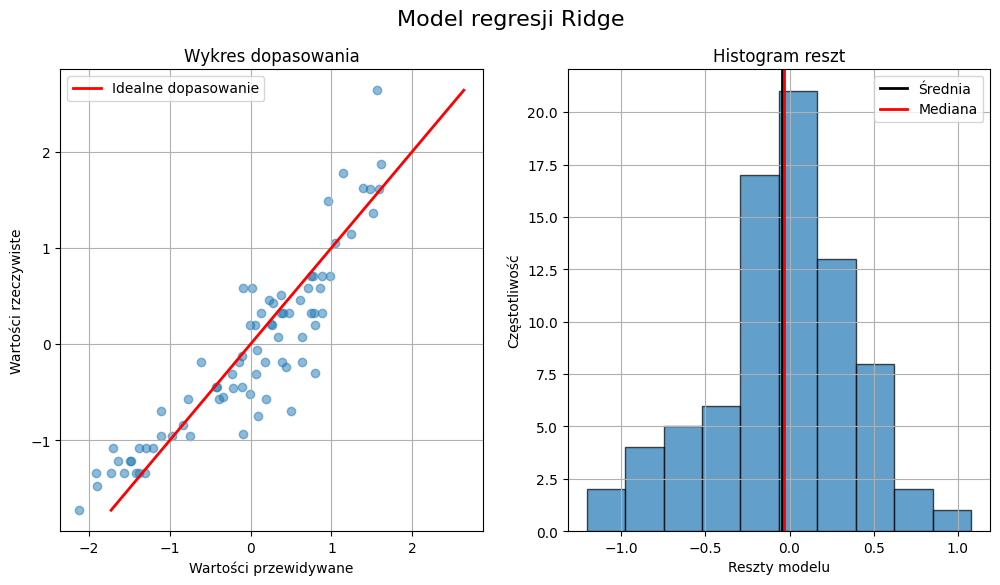

In [ ]:
import matplotlib.pyplot as plt

# Predykcje modelu Ridge
y1_pred_ridge = model_ridge.predict(X1_test)

# Tworzenie wykresu
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Model regresji Ridge", fontsize=16)

# Wykres dopasowania
axes[0].scatter(y1_pred_ridge, y1_test, alpha=0.5)  # Predykcje vs rzeczywiste
axes[0].plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], color="red", linewidth=2, label="Idealne dopasowanie")
axes[0].set_title("Wykres dopasowania")
axes[0].set_xlabel("Wartości przewidywane")
axes[0].set_ylabel("Wartości rzeczywiste")
axes[0].legend()
axes[0].grid(True)

# Histogram reszt
residuals_ridge = y1_test - y1_pred_ridge  # Obliczenie reszt
axes[1].hist(residuals_ridge, bins=10, edgecolor="black", alpha=0.7)
axes[1].axvline(residuals_ridge.mean(), color="black", linewidth=2, label="Średnia")
axes[1].axvline(residuals_ridge.median(), color="red", linewidth=2, label="Mediana")
axes[1].set_title("Histogram reszt")
axes[1].set_xlabel("Reszty modelu")
axes[1].set_ylabel("Częstotliwość")
axes[1].legend()
axes[1].grid(True)

plt.show()

### Wnioski
Model regresji Ridge jest całkiem nieźle dopasowany. Histogram ma lekką niesymetryczność, natomiast średnia pokrywa się na nim z medianą.

#### Model ElasticNet

In [ ]:
# Model regresji ElasticNet

from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha=0.2, random_state=327)
model_elastic = elastic_reg.fit(X1_train, y1_train)
print(f"Beta_0: {model_elastic.intercept_}")
print(f"Liczba zmiennych: {model_elastic.n_features_in_}")
print(f"Zmienne modelu: {model_elastic.feature_names_in_}")

Beta_0: 0.012756227672941595
Liczba zmiennych: 8
Zmienne modelu: ['cylinders' 'displacement' 'horsepower' 'weight' 'acceleration'
 'model_year' 'origin_japan' 'origin_usa']


In [ ]:
idx3 = np.argwhere(model_elastic.coef_ != 0)
print(model_elastic.feature_names_in_[idx3])

[['cylinders']
 ['displacement']
 ['horsepower']
 ['weight']
 ['model_year']
 ['origin_japan']
 ['origin_usa']]


In [ ]:
# Ocena modelu

y_pred_elastic = model_elastic.predict(X1_test)
mse_elastic = mean_squared_error(y_true=y1_test, y_pred=y_pred_elastic)
r2_elastic = r2_score(y_true=y1_test, y_pred=y_pred_elastic)
mae_elastic = mean_absolute_error(y_true=y1_test, y_pred=y_pred_elastic)
print(f"MSE: {mse_elastic}")
print(f"R^2: {r2_elastic}")
print(f"MAE: {mae_elastic}")

MSE: 0.17624564011209454
R^2: 0.7901832805984614
MAE: 0.30388815215356657


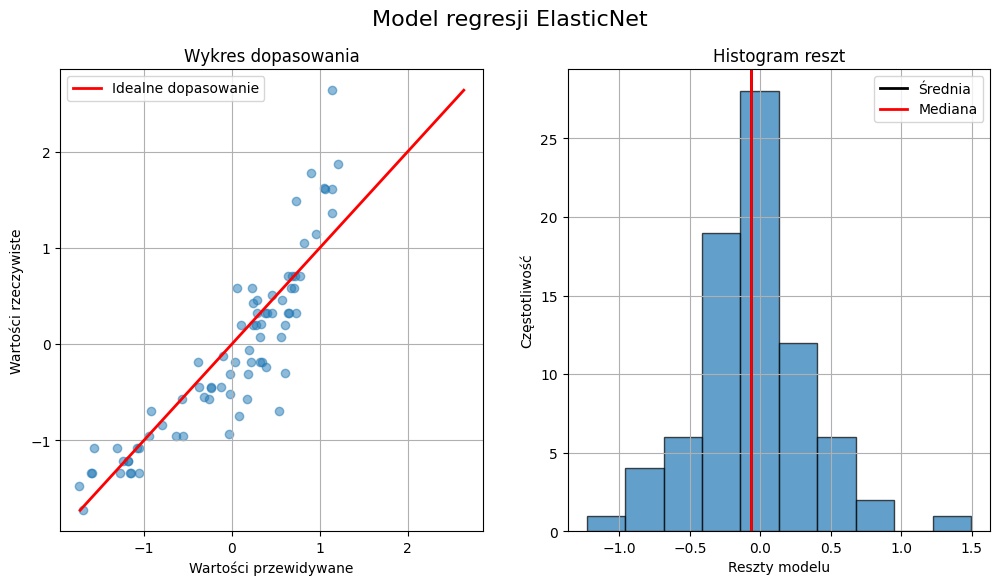

In [ ]:
import matplotlib.pyplot as plt

# Predykcje modelu ElasticNet
y_pred_elastic = model_elastic.predict(X1_test)

# Tworzenie wykresu
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Model regresji ElasticNet", fontsize=16)

# Wykres dopasowania
axes[0].scatter(y_pred_elastic, y1_test, alpha=0.5)  # Predykcje vs rzeczywiste
axes[0].plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], color="red", linewidth=2, label="Idealne dopasowanie")
axes[0].set_title("Wykres dopasowania")
axes[0].set_xlabel("Wartości przewidywane")
axes[0].set_ylabel("Wartości rzeczywiste")
axes[0].legend()
axes[0].grid(True)

# Histogram reszt
residuals_elastic = y1_test - y_pred_elastic  # Obliczenie reszt
axes[1].hist(residuals_elastic, bins=10, edgecolor="black", alpha=0.7)
axes[1].axvline(residuals_elastic.mean(), color="black", linewidth=2, label="Średnia")
axes[1].axvline(residuals_elastic.median(), color="red", linewidth=2, label="Mediana")
axes[1].set_title("Histogram reszt")
axes[1].set_xlabel("Reszty modelu")
axes[1].set_ylabel("Częstotliwość")
axes[1].legend()
axes[1].grid(True)

plt.show()

### Wnioski
Wykres dopasowania wygląda podobnie jak w przypadku Lasso. Histogram reszt jest raczej symetryczny i przypomina kształtem rozkład normalny.

#### Modelowanie nieliniowe

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

autompg_nieliniowy = autompg_original.copy()
autompg_nieliniowy = autompg_nieliniowy.dropna()

# Tworzenie nowych cech
autompg_nieliniowy['horsepower^2'] = autompg_nieliniowy['horsepower'] ** 2
autompg_nieliniowy['logweight'] = np.log(autompg_nieliniowy['weight'])

autompg_nieliniowy = autompg_nieliniowy.drop(columns=['horsepower', 'weight'])
# One-hot encoding
autompg_nieliniowy = pd.get_dummies(autompg_nieliniowy, columns=['origin'], prefix='origin', dtype=int, drop_first=True)

# Skalowanie
scaler = StandardScaler()
columns_to_scale = ['cylinders', 'displacement', 'horsepower^2', 'logweight',
                    'acceleration', 'model_year', 'origin_japan', 'origin_usa', 'mpg']

autompg_nieliniowy[columns_to_scale] = scaler.fit_transform(autompg_nieliniowy[columns_to_scale])
autompg_nieliniowy = autompg_nieliniowy.drop(columns=['name'])

# Podział na X i y
X2 = autompg_nieliniowy.drop(columns='mpg')
y2 = autompg_nieliniowy['mpg']

# Podział na treningowy i testowy
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=327)


In [ ]:
import pandas as pd
lin_reg_2 = LinearRegression()
model2 = lin_reg_2.fit(X2_train, y2_train)

In [ ]:
# Ocena modelu

y_pred_poli = model2.predict(X2_test)
mse_poli = mean_squared_error(y_true=y2_test, y_pred=y_pred_poli)
r2_poli = r2_score(y_true=y2_test, y_pred=y_pred_poli)
mae_poli = mean_absolute_error(y_true=y2_test, y_pred=y_pred_poli)
print(f"MSE: {mse_poli}")
print(f"R^2: {r2_poli}")
print(f"MAE: {mae_poli}")

MSE: 0.15546240741359874
R^2: 0.829556345704222
MAE: 0.29321038268657335


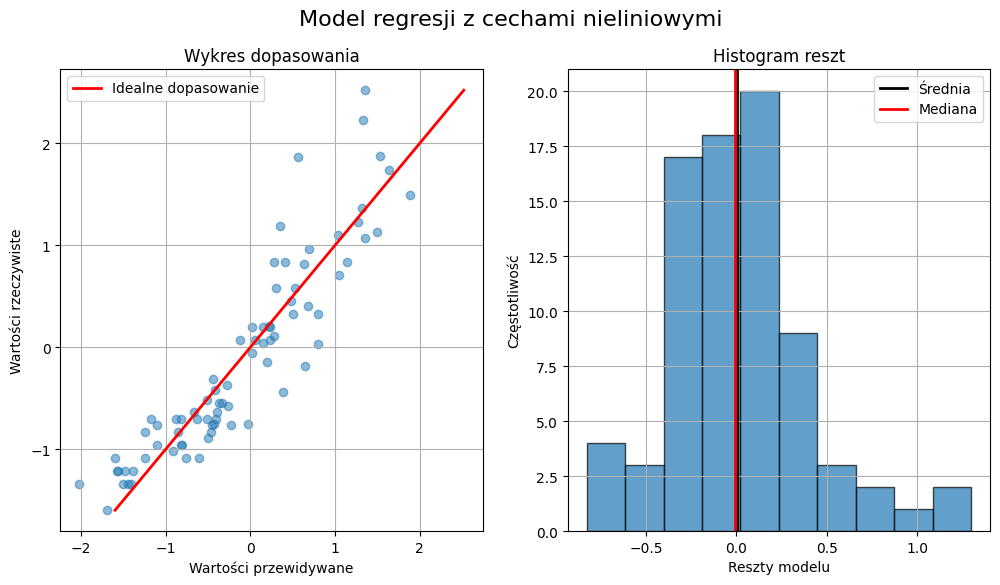

In [ ]:
import matplotlib.pyplot as plt

# Predykcje modelu z cechami nieliniowymi
y_pred_poli = model2.predict(X2_test)

# Tworzenie wykresu
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Model regresji z cechami nieliniowymi", fontsize=16)

# Wykres dopasowania
axes[0].scatter(y_pred_poli, y2_test, alpha=0.5)  # Predykcje vs rzeczywiste
axes[0].plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], color="red", linewidth=2, label="Idealne dopasowanie")
axes[0].set_title("Wykres dopasowania")
axes[0].set_xlabel("Wartości przewidywane")
axes[0].set_ylabel("Wartości rzeczywiste")
axes[0].legend()
axes[0].grid(True)

# Histogram reszt
residuals_poli = y2_test - y_pred_poli  # Obliczenie reszt
axes[1].hist(residuals_poli, bins=10, edgecolor="black", alpha=0.7)
axes[1].axvline(residuals_poli.mean(), color="black", linewidth=2, label="Średnia")
axes[1].axvline(residuals_poli.median(), color="red", linewidth=2, label="Mediana")
axes[1].set_title("Histogram reszt")
axes[1].set_xlabel("Reszty modelu")
axes[1].set_ylabel("Częstotliwość")
axes[1].legend()
axes[1].grid(True)

plt.show()

### Wnioski
W tym przypadku model jest całkiem nieźle dopasowany, chociaż na wykresie dopasowania widać kilka wartości rozrzuconych dalej od linii regresji. Kształt histogramu zawiera delikatną asymetrię, ale ogólnie rzecz biorąc wygląda dość dobrze.

### Interpretacja wyników


In [ ]:
import pandas as pd

mae = mean_absolute_error(y_test, y_pred)

# Wyniki dla każdego modelu

wyniki = {
    'miara': ["MSE", "R^2", "MAE"],
    'model_liniowy': [mse, r2, mae],
    'model_nielinowy': [mse_poli, r2_poli, mae_poli],
    'model_lasso': [mse_lasso, r2_lasso, mae_lasso],
    'model_ridge': [mse_ridge, r2_ridge, mae_ridge],
    'model_elastic': [mse_elastic, r2_elastic, mae_elastic]
}

# Tworzenie DataFrame
df_wyniki = pd.DataFrame(wyniki).set_index("miara").T

# Sortowanie wyników według R^2
df_wyniki_sorted = df_wyniki.sort_values(by="R^2", ascending=False)

df_wyniki
df_wyniki_sorted

miara,MSE,R^2,MAE
model_nielinowy,0.155462,0.829556,0.293210
model_ridge,0.174682,0.792044,0.315859
model_elastic,0.176246,0.790183,0.303888
model_lasso,0.184764,0.780042,0.308258
model_liniowy,0.272474,0.701268,0.380785


### Dodatkowe pytania

1. Które cechy najbardziej wpływają na zużycie paliwa?

Cechy takie jak displacement i model_year mają duży wpływ na zużycie paliwa. W modelach, które uwzględniają te cechy, wyniki będą dokładniejsze.

2. Czy dodanie transformacji nieliniowych poprawia model?

Tak, dodanie transformacji nieliniowych (np. kwadrat mocy lub logarytm wagi) poprawia dokładność modelu, co widać w MSE i MAE oraz R². W naszym przypadku model nieliniowy okazał się najlepszym modelem ze wszystkich.

3. Jakie są zalety i wady modeli Lasso i Ridge w porównaniu do klasycznej regresji?

Lasso: Redukuje nieistotne cechy do zera, co pomaga w selekcji cech, ale może zbyt agresywnie eliminować zmienne.

Ridge: Zmniejsza współczynniki, co stabilizuje model, ale nie usuwa cech.
W porównaniu do klasycznej regresji, Ridge i Lasso dają lepsze wyniki, ponieważ zapobiegają przeuczeniu.

4. Czy są cechy, które nie mają sensu w modelu regresji? Jak je wykryć?

Cechy, które nie mają związku z celem (zużyciem paliwa), mogą być zbędne. Warto wykrywać je poprzez analizę korelacji i eliminowanie zmiennych, które mają mały wpływ lub są skorelowane z innymi cechami.

5. Jak zmieniają się wyniki w zależności od liczby cech?

Zbyt wiele cech może pogorszyć wyniki, zwłaszcza w klasycznej regresji liniowej. Modele Ridge i Lasso lepiej radzą sobie z dużą liczbą cech dzięki regularizacji.

6. Czy regularizacja poprawia uogólnienie modelu na nowych danych?

Tak, regularizacja (Lasso i Ridge) poprawia uogólnienie, ponieważ zapobiega przeuczeniu i pomaga modelowi działać lepiej na nowych danych.